## Project created by:
- ## Subhechha Mondal
- ## Rakhi Sau

# **Ecommerce Sales Analysis**

## Introduction
***In the competitive e-commerce landscape, data-driven insights are crucial for optimizing sales, enhancing customer experience, and improving operational efficiency. This analysis identifies key business trends, including revenue drivers, regional performance, customer behavior, and sales patterns. By addressing these factors, businesses can make informed decisions to boost growth and profitability.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data cleaning and Understanding

In [3]:
file_path="/content/drive/My Drive/Colab Notebooks/Ecomm_Customer_Data.csv"
df=pd.read_csv(file_path)

In [4]:
df.head()

,Order_Date,Order Id,Order Status,Customer Code,City,State,Product Name,Order quantity,Gross amount,Day,Month,Week,sku,Variant Name,Skin Tones,Category 2,Week Ending Date,Zone
0,09-08-2020,ORD-0001,DELIVERED,cust_code-16,Hathras,Uttar Pradesh,Mini Power Matte Lipcolour,1,75,9,8,32,LG-40-19,Mini Power Matte Lipcolour-Dive,Fair Tone&Medium Tone&Dusky Tone,Lips,09-08-2020,North
1,09-08-2020,ORD-0001,DELIVERED,cust_code-16,Hathras,Uttar Pradesh,Mini Power Matte Lipcolour,1,75,9,8,32,LG-40-8,Mini Power Matte Lipcolour-Coral Dream,Fair Tone&Medium Tone&Dusky Tone,Lips,09-08-2020,North
2,09-08-2020,ORD-0001,DELIVERED,cust_code-16,Hathras,Uttar Pradesh,Primer Matte Lipstick,1,80,9,8,32,L-24-A9,Primer Matte Lipstick-Pink Curve,Fair Tone&Medium Tone&Dusky Tone,Lips,09-08-2020,North
3,09-08-2020,ORD-0001,DELIVERED,cust_code-16,Hathras,Uttar Pradesh,Mini Power Matte Lipcolour,1,75,9,8,32,LG-40-3,Mini Power Matte Lipcolour-Divine Wine,Fair Tone&Medium Tone&Dusky Tone,Lips,09-08-2020,North
4,09-08-2020,ORD-0001,DELIVERED,cust_code-16,Hathras,Uttar Pradesh,Mini Power Matte Lipcolour,1,75,9,8,32,LG-40-7,Mini Power Matte Lipcolour-Satin Rose,Fair Tone&Medium Tone&Dusky Tone,Lips,09-08-2020,North


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_Date        8164 non-null   object
 1   Order Id          8164 non-null   object
 2   Order Status      8164 non-null   object
 3   Customer Code     8164 non-null   object
 4   City              8164 non-null   object
 5   State             8164 non-null   object
 6   Product Name      8164 non-null   object
 7   Order quantity    8164 non-null   int64 
 8   Gross amount      8164 non-null   int64 
 9   Day               8164 non-null   int64 
 10  Month             8164 non-null   int64 
 11  Week              8164 non-null   int64 
 12  sku               8164 non-null   object
 13  Variant Name      8164 non-null   object
 14  Skin Tones        8161 non-null   object
 15  Category 2        8164 non-null   object
 16  Week Ending Date  8164 non-null   object
 17  Zone          

In [6]:
# check for null values
pd.isnull(df).sum()


,0
Order_Date,0
Order Id,0
Order Status,0
Customer Code,0
City,0
State,0
Product Name,0
Order quantity,0
Gross amount,0
Day,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 8163
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_Date        8161 non-null   object
 1   Order Id          8161 non-null   object
 2   Order Status      8161 non-null   object
 3   Customer Code     8161 non-null   object
 4   City              8161 non-null   object
 5   State             8161 non-null   object
 6   Product Name      8161 non-null   object
 7   Order quantity    8161 non-null   int64 
 8   Gross amount      8161 non-null   int64 
 9   Day               8161 non-null   int64 
 10  Month             8161 non-null   int64 
 11  Week              8161 non-null   int64 
 12  sku               8161 non-null   object
 13  Variant Name      8161 non-null   object
 14  Skin Tones        8161 non-null   object
 15  Category 2        8161 non-null   object
 16  Week Ending Date  8161 non-null   object
 17  Zone              8

In [9]:
duplicated_rows=df.duplicated()
print(duplicated_rows)
#df.drop_duplicates(inplace=True)

0       False
1       False
2       False
3       False
4       False
        ...  
8159    False
8160    False
8161    False
8162    False
8163    False
Length: 8161, dtype: bool


In [10]:
#df.rename(columns={'Job_Title':'Designation'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 8163
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_Date        8161 non-null   object
 1   Order Id          8161 non-null   object
 2   Order Status      8161 non-null   object
 3   Customer Code     8161 non-null   object
 4   City              8161 non-null   object
 5   State             8161 non-null   object
 6   Product Name      8161 non-null   object
 7   Order quantity    8161 non-null   int64 
 8   Gross amount      8161 non-null   int64 
 9   Day               8161 non-null   int64 
 10  Month             8161 non-null   int64 
 11  Week              8161 non-null   int64 
 12  sku               8161 non-null   object
 13  Variant Name      8161 non-null   object
 14  Skin Tones        8161 non-null   object
 15  Category 2        8161 non-null   object
 16  Week Ending Date  8161 non-null   object
 17  Zone              8

In [11]:
df.rename(columns={'Order Id':'Order_Id',
                  'Order Status':'Order_Status',
                  'Customer Code':'Customer_Code',
                   'Product Name':'Product_Name',
                   'Order quantity':'Order_Quantity',
                   'Gross amount':'Gross_Amount',
                   'sku':'Stock_Keeping_Unit',
                   'Variant Name':'Variant_Name',
                   'Skin Tones':'Skin_Tones',
                   'Category 2':'Category2',
                   'Week Ending Date':'Week_Ending_Date'},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 8163
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order_Date          8161 non-null   object
 1   Order_Id            8161 non-null   object
 2   Order_Status        8161 non-null   object
 3   Customer_Code       8161 non-null   object
 4   City                8161 non-null   object
 5   State               8161 non-null   object
 6   Product_Name        8161 non-null   object
 7   Order_Quantity      8161 non-null   int64 
 8   Gross_Amount        8161 non-null   int64 
 9   Day                 8161 non-null   int64 
 10  Month               8161 non-null   int64 
 11  Week                8161 non-null   int64 
 12  Stock_Keeping_Unit  8161 non-null   object
 13  Variant_Name        8161 non-null   object
 14  Skin_Tones          8161 non-null   object
 15  Category2           8161 non-null   object
 16  Week_Ending_Date    8161 non-

# Data Visualization and Analysis

### Problems
Identify the top-selling products to optimize inventory, enhance marketing efforts, and maximize revenue by focusing on high-demand items.

<ipython-input-21-c7503a16e314>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Gross_Amount", y="Product_Name", palette="viridis")


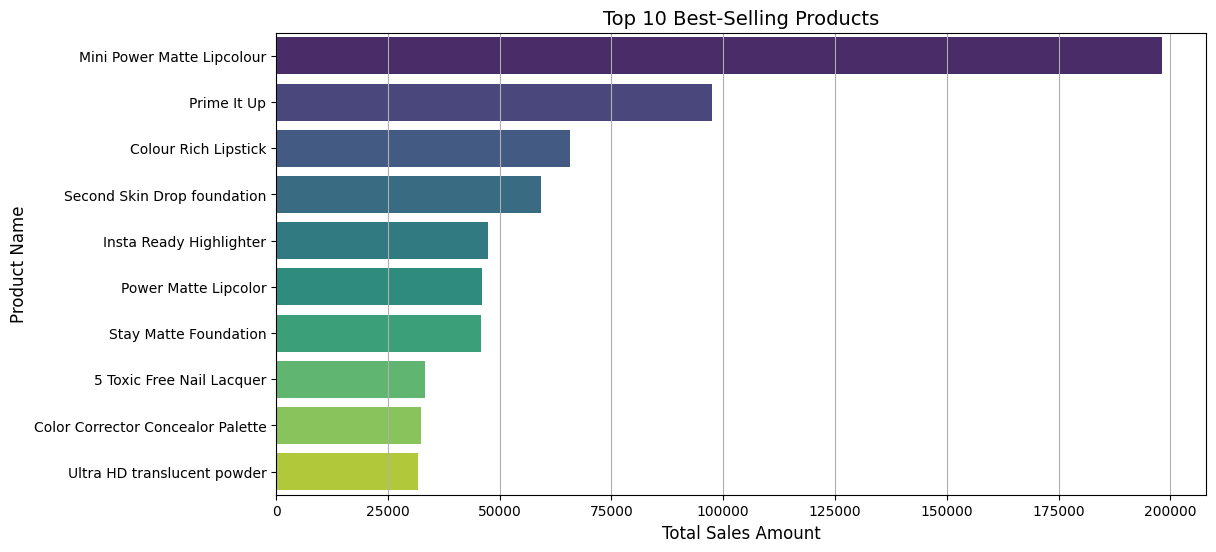

In [21]:
top_products = df.groupby("Product_Name")["Gross_Amount"].sum().reset_index()
top_products = top_products.sort_values(by="Gross_Amount", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="Gross_Amount", y="Product_Name", palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales Amount", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.grid(axis="x")
plt.show()

### Insights:
- The top 10 products contribute significantly to total sales.

- Certain products dominate, indicating strong customer preference.

- Best-sellers can be leveraged for marketing and inventory planning.

- Trends may highlight category popularity for future promotions.


### Problems
Identify top revenue-generating states to focus on high-performing regions for business expansion while addressing low-performing areas with targeted strategies.

<ipython-input-22-ad44deff6d99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x="State", y="Gross_Amount", palette="coolwarm")


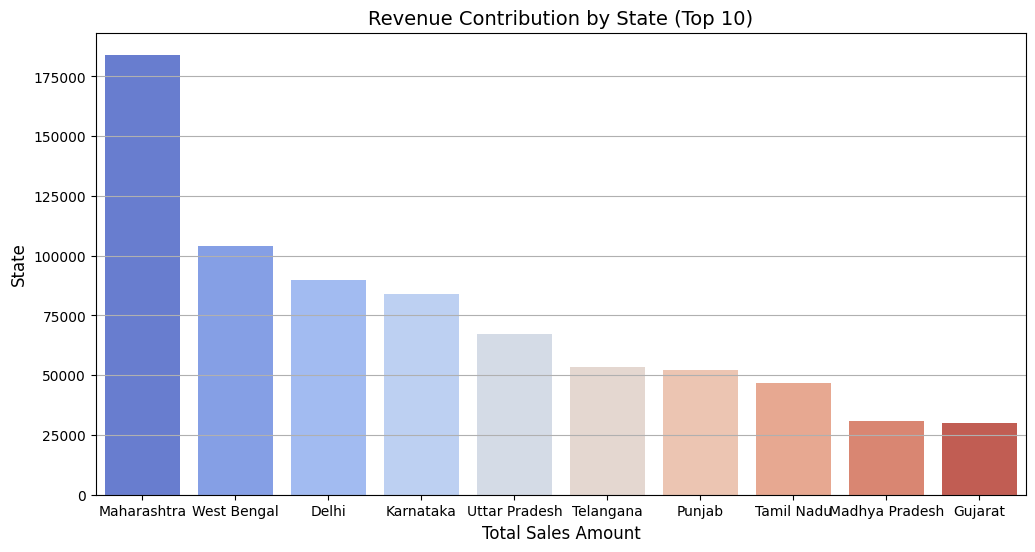

In [22]:
state_sales = df.groupby("State")["Gross_Amount"].sum().reset_index()
state_sales = state_sales.sort_values(by="Gross_Amount", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales, x="State", y="Gross_Amount", palette="coolwarm")
#sns.barplot(data=state_sales, x="Gross_Amount", y="State", palette="coolwarm")
plt.title("Revenue Contribution by State (Top 10)", fontsize=14)
plt.xlabel("Total Sales Amount", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis="y")
plt.show()

### Insights
- The top 10 states contribute the most to overall revenue.
- Some states significantly outperform others, indicating strong customer presence.
- High-revenue states can be targeted for further marketing and expansion.
- Low-performing states might need localized strategies or better distribution.

### Problems
Analyze order status distribution to identify potential issues such as high cancellation, return rates, or processing delays, helping improve operational efficiency and customer satisfaction.

<ipython-input-23-6292ea4b5fbe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm")


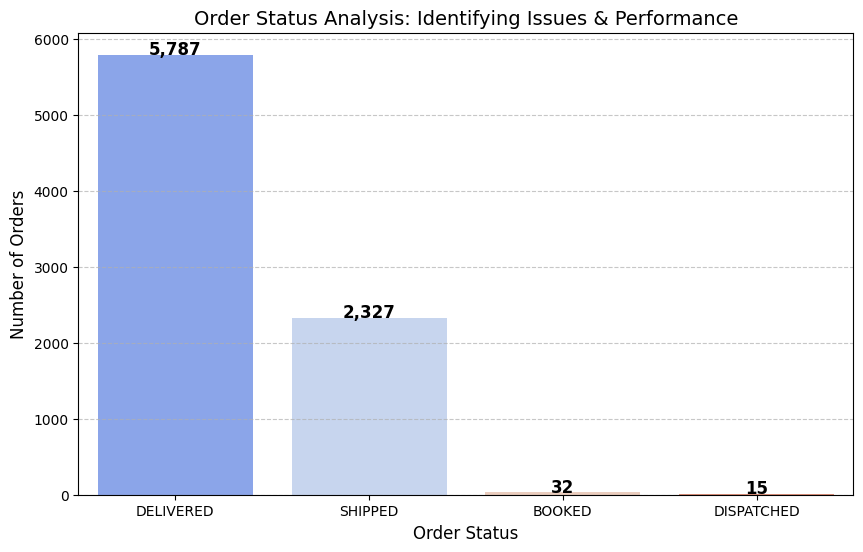

In [23]:


# Aggregate number of orders by Order Status
order_status_counts = df["Order_Status"].value_counts()

# Plot Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm")

# Add value labels on top of bars
for index, value in enumerate(order_status_counts.values):
    ax.text(index, value + 5, f'{value:,}', ha='center', fontsize=12, fontweight='bold')

plt.title("Order Status Analysis: Identifying Issues & Performance", fontsize=14)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Insights
- The distribution of order statuses highlights overall order flow and potential issues.
- A high number of completed orders suggests smooth operations.
- Significant canceled or returned orders may indicate customer dissatisfaction, product issues, or logistical problems.
- Identifying trends in pending or failed orders can help improve order fulfillment and customer experience.

### Problems
Identify seasonal trends in order volume to understand peak and low-demand months, helping optimize inventory management, marketing strategies, and sales planning.

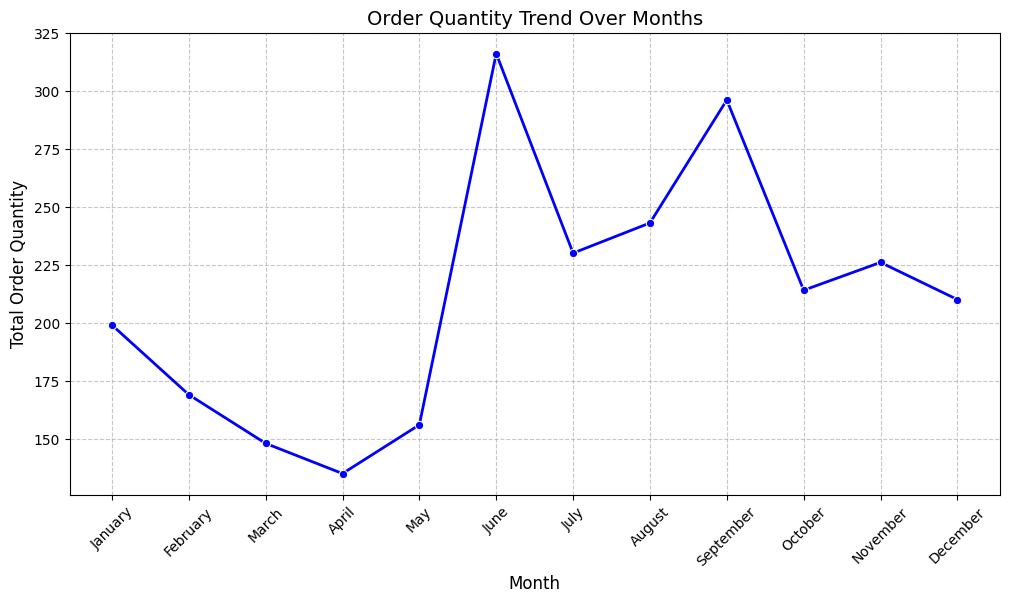

In [24]:

# Ensure "Month" column exists and extract if necessary
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")  # Convert to datetime
df["Month"] = df["Order_Date"].dt.strftime("%B")  # Extract Month as full name

# Aggregate Order Quantity by Month
monthly_orders = df.groupby("Month")["Order_Quantity"].sum().reset_index()

# Define a proper month order for sorting
month_order = ["January", "February", "March", "April", "May", "June", "July",
               "August", "September", "October", "November", "December"]
monthly_orders["Month"] = pd.Categorical(monthly_orders["Month"], categories=month_order, ordered=True)
monthly_orders = monthly_orders.sort_values("Month")

# Plot Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x="Month", y="Order_Quantity", marker="o", color="b", linewidth=2)

plt.title("Order Quantity Trend Over Months", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Order Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


### Insights
- Seasonal Trends: Order volume fluctuates across months, indicating potential seasonal demand patterns.
- Peak Months: High-order months suggest periods of increased customer activity (e.g., holidays, promotions).
- Slow Months: Lower-order months may indicate off-peak seasons or areas for sales improvement.
- Strategic Planning: Businesses can align marketing, inventory, and discounts with peak demand periods.


Customer Purchase Behavior Analysis

Problem:

Which customers contribute the most to total revenue? Identifying high-value customers helps in targeted marketing and loyalty programs.

<ipython-input-25-2285ee7d39e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="Gross_Amount", y="Customer_Code", palette="magma")


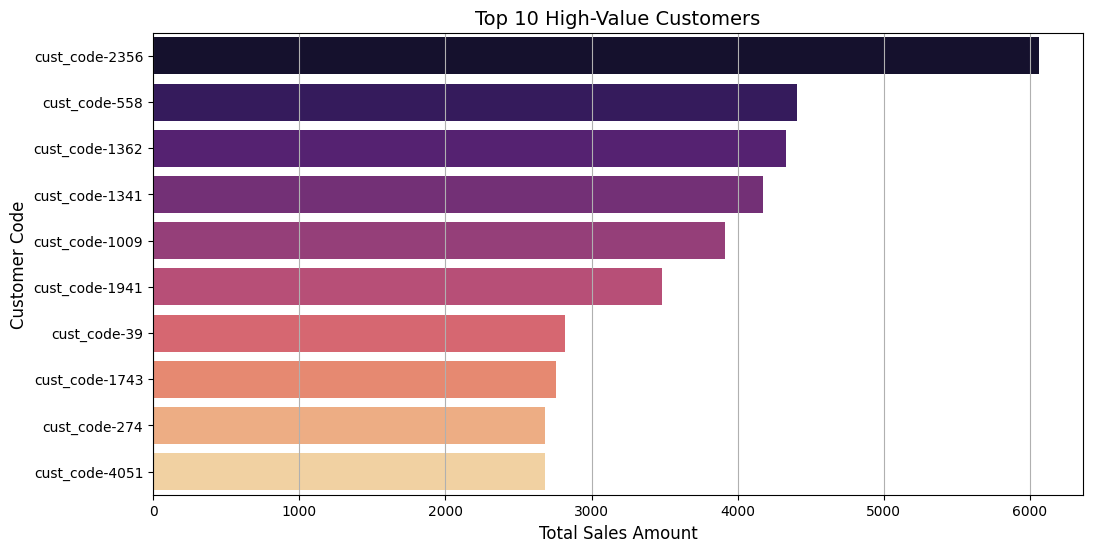

In [25]:
# Aggregate total sales per customer
top_customers = df.groupby("Customer_Code")["Gross_Amount"].sum().reset_index()
top_customers = top_customers.sort_values(by="Gross_Amount", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x="Gross_Amount", y="Customer_Code", palette="magma")
plt.title("Top 10 High-Value Customers", fontsize=14)
plt.xlabel("Total Sales Amount", fontsize=12)
plt.ylabel("Customer Code", fontsize=12)
plt.grid(axis="x")
plt.show()


Insight:

The top 10 customers contribute a significant portion of total revenue. Understanding their purchasing behavior can help create personalized promotions and exclusive deals.



Category-wise Sales Performance

Problem:

Which product categories drive the most revenue? This helps optimize inventory and marketing focus.

<ipython-input-26-dce44b404b9f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Gross_Amount", y="Category2", palette="plasma")


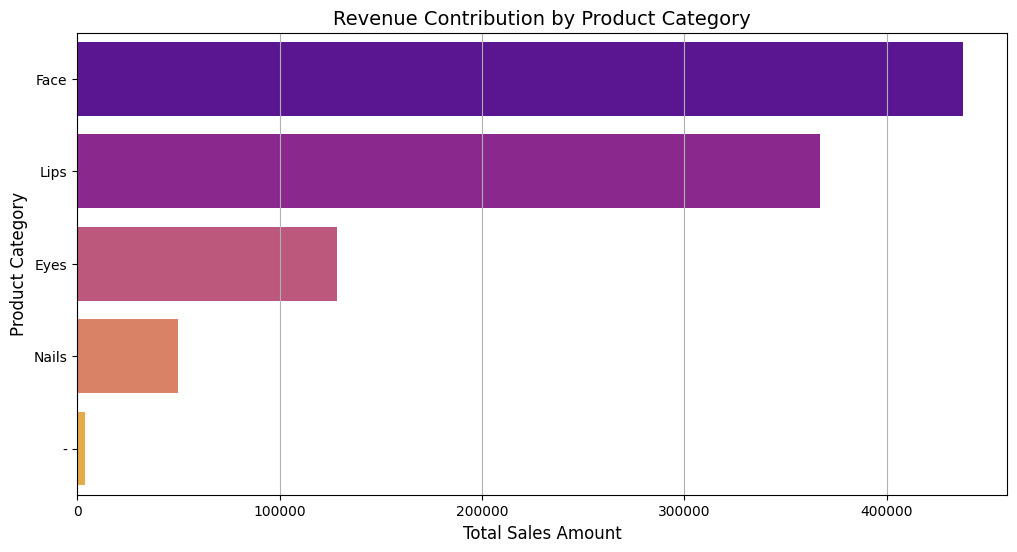

In [26]:
# Aggregate sales per category
category_sales = df.groupby("Category2")["Gross_Amount"].sum().reset_index()
category_sales = category_sales.sort_values(by="Gross_Amount", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x="Gross_Amount", y="Category2", palette="plasma")
plt.title("Revenue Contribution by Product Category", fontsize=14)
plt.xlabel("Total Sales Amount", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis="x")
plt.show()


Insight:

Certain product categories generate the highest revenue, indicating areas for potential expansion or promotions.

Zone-wise Order Distribution

Problem:

Which zones contribute the most and least to total orders? This insight helps in logistics and supply chain planning.

<ipython-input-27-d6b567c8f963>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_orders, x="Order_Quantity", y="Zone", palette="coolwarm")


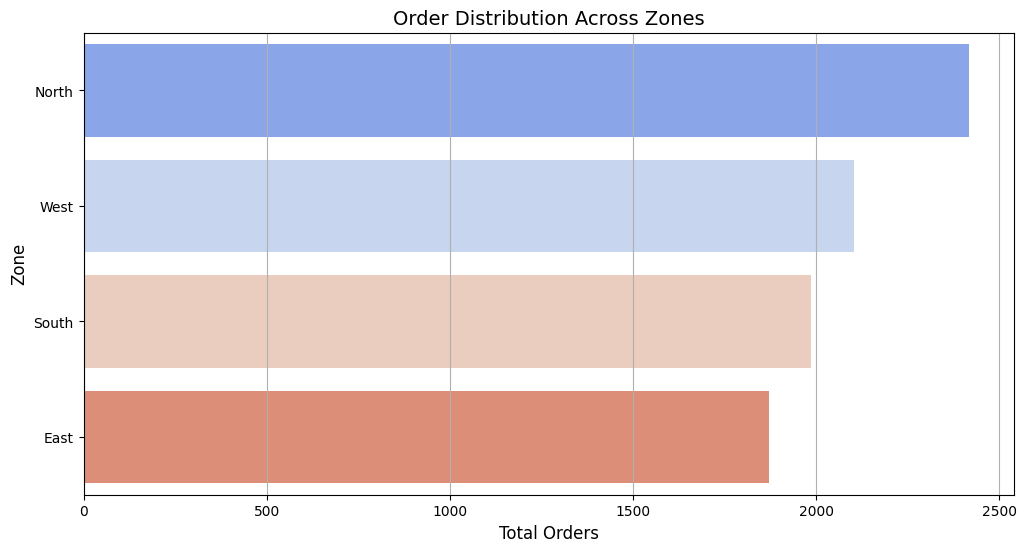

In [27]:
# Aggregate total orders per zone
zone_orders = df.groupby("Zone")["Order_Quantity"].sum().reset_index()
zone_orders = zone_orders.sort_values(by="Order_Quantity", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=zone_orders, x="Order_Quantity", y="Zone", palette="coolwarm")
plt.title("Order Distribution Across Zones", fontsize=14)
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Zone", fontsize=12)
plt.grid(axis="x")
plt.show()


Insight:

Some zones have significantly higher order volumes than others. Businesses can use this insight to adjust delivery networks and distribution centers.

Sales Trend Analysis Over Weeks

Problem:

Are there any significant sales trends over weeks? Identifying peak and slow sales periods helps with demand forecasting.

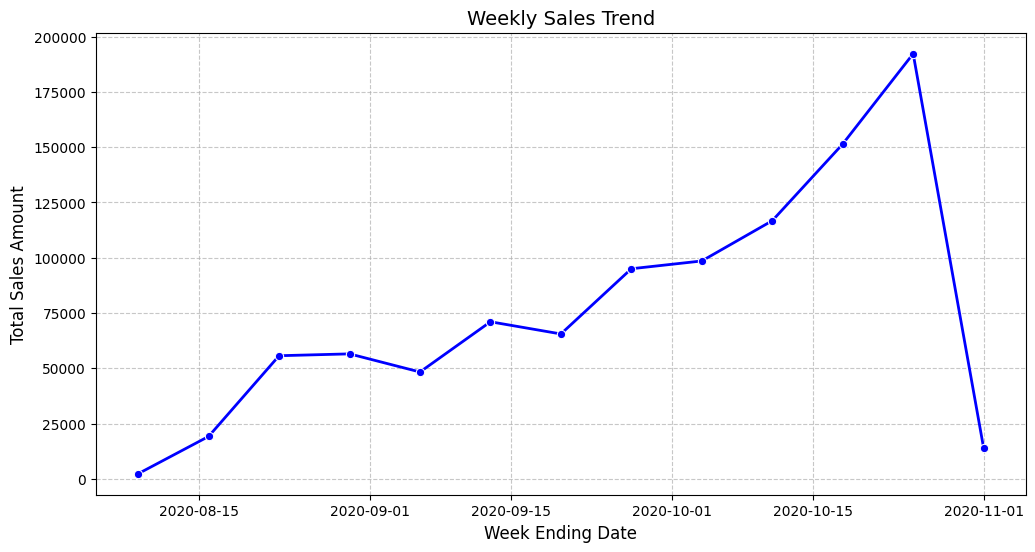

In [28]:
# Aggregate sales by week
weekly_sales = df.groupby("Week_Ending_Date")["Gross_Amount"].sum().reset_index()

# Convert to datetime with automatic inference
weekly_sales["Week_Ending_Date"] = pd.to_datetime(weekly_sales["Week_Ending_Date"], dayfirst=True, errors='coerce')

# Drop any rows where conversion failed (optional)
weekly_sales = weekly_sales.dropna(subset=["Week_Ending_Date"])

# Sort by date
weekly_sales = weekly_sales.sort_values("Week_Ending_Date")

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x="Week_Ending_Date", y="Gross_Amount", marker="o", color="b", linewidth=2)

plt.title("Weekly Sales Trend", fontsize=14)
plt.xlabel("Week Ending Date", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


### **Insight:**  

The weekly sales trend shows fluctuations, indicating variations in customer demand over time. Peaks suggest high sales periods, possibly due to promotions or seasonal factors, while dips may highlight slow business weeks. Monitoring these trends can help optimize inventory, marketing strategies, and sales forecasting.

## **Conclusion**  

The analysis reveals that a few top-selling products generate the majority of revenue, with certain states contributing significantly more to overall sales. Order status insights highlight potential inefficiencies in fulfillment, particularly with cancellations and pending orders. Additionally, sales patterns vary by month, indicating seasonal demand fluctuations. Optimizing inventory, enhancing logistics, and leveraging targeted marketing strategies can drive better sales performance and customer satisfaction.